In [ ]:
#GuanHung Lai

# 1. Logistic Regression

In [13]:
from sklearn import linear_model as lm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

data=np.loadtxt("e_car_data.csv", delimiter=',', skiprows=1,  usecols=(0,4,8,9,7))

print("data.shape =",data.shape, "\n data[:10, :]=\n", data[:10, :],"\n")

data.shape = (20779, 5) 
 data[:10, :]=
 [[2.000000e+00 2.100000e+04 6.190000e+00 1.838800e+00 0.000000e+00]
 [4.000000e+00 1.888875e+04 7.990000e+00 1.838800e+00 1.000000e+00]
 [1.000000e+00 3.500000e+04 5.850000e+00 1.838800e+00 0.000000e+00]
 [2.000000e+00 1.651000e+04 6.190000e+00 1.838800e+00 1.000000e+00]
 [1.000000e+00 2.700000e+04 5.850000e+00 1.838800e+00 0.000000e+00]
 [1.000000e+00 1.750000e+04 5.850000e+00 1.838800e+00 0.000000e+00]
 [2.000000e+00 1.302426e+04 6.190000e+00 1.838800e+00 1.000000e+00]
 [1.000000e+00 1.000000e+04 5.850000e+00 1.838800e+00 1.000000e+00]
 [2.000000e+00 3.596000e+04 6.190000e+00 1.838800e+00 0.000000e+00]
 [2.000000e+00 1.650000e+04 6.190000e+00 1.838800e+00 1.000000e+00]] 



In [14]:
#Tier=0, Amount= 4, apr = 8, prime = 9
x=data[:,0:4]
print("x[:10]=\n",x[:10])
print("x has length="+str(len(x)))

x[:10]=
 [[2.000000e+00 2.100000e+04 6.190000e+00 1.838800e+00]
 [4.000000e+00 1.888875e+04 7.990000e+00 1.838800e+00]
 [1.000000e+00 3.500000e+04 5.850000e+00 1.838800e+00]
 [2.000000e+00 1.651000e+04 6.190000e+00 1.838800e+00]
 [1.000000e+00 2.700000e+04 5.850000e+00 1.838800e+00]
 [1.000000e+00 1.750000e+04 5.850000e+00 1.838800e+00]
 [2.000000e+00 1.302426e+04 6.190000e+00 1.838800e+00]
 [1.000000e+00 1.000000e+04 5.850000e+00 1.838800e+00]
 [2.000000e+00 3.596000e+04 6.190000e+00 1.838800e+00]
 [2.000000e+00 1.650000e+04 6.190000e+00 1.838800e+00]]
x has length=20779


In [15]:
y=(data[:,4]>0)
print("y[:10]=",y[:10])
print("Fraction of loans accepted is", '%.3f'% np.mean(y))

y[:10]= [False  True False  True False False  True  True False  True]
Fraction of loans accepted is 0.451


In [16]:
logistic=lm.LogisticRegression()
logistic.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
##Get R^2
logistic.score(x,y)

0.6113864959815198

In [18]:
##Getting intercepts and Coefficients
print("intercept =", logistic.intercept_)
print("coefficients =",logistic.coef_)

intercept = [0.04303756]
coefficients = [[ 3.99053530e-02 -5.29466457e-05  9.39824417e-02  5.01993799e-02]]


In [19]:
ypred=logistic.predict_proba(x)
ypred[:,1] ###only the accept column

array([0.42190126, 0.51144534, 0.24451454, ..., 0.58766618, 0.32312832,
       0.23964002])

In [44]:
print("Error probability of logistic classifier(in-sample):", '%.3f'%(1-logistic.score(x,y)))
print("RMSE of logistic prediction of probability is: ", '%.3f'%np.std(y-ypred[:,1]))


Error probability of logistic classifier(in-sample): 0.389
RMSE of logistic prediction of probability is:  0.472


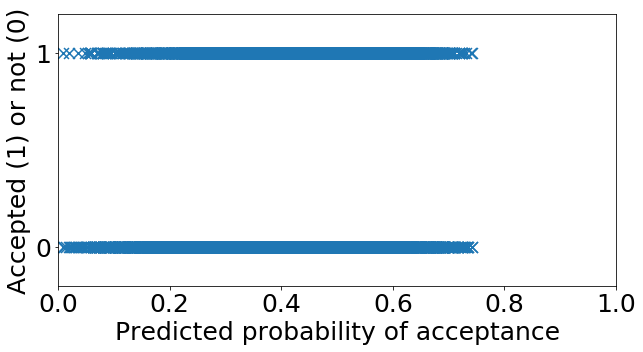

In [21]:
#Plot the ground truth vs the predicted probability of acceptance using pyplot
matplotlib.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,5))
plt.scatter(ypred[:,1], y, marker = 'x', s = 120.)
plt.xlim(0, 1)
plt.ylim(-0.2, 1.2)
plt.yticks([0,1])
plt.xlabel('Predicted probability of acceptance')
plt.ylabel('Accepted (1) or not (0)')
plt.show()


In [22]:
Acceptypred = ypred[:,1]
countnum = []
countnum2 = []
countnum3 = []
countnum4 = []
countnum5 = []

for num in Acceptypred:
    if num >= 0 and num < 0.2:
        countnum.append(num)
    if num >= 0.2 and num < 0.4:
        countnum2.append(num)
    if num >= 0.4 and num < 0.6:
        countnum3.append(num)
    if num >= 0.6 and num < 0.8:
        countnum4.append(num)
    if num >= 0.8 and num < 1.0:
        countnum5.append(num)
        
count1 = len(countnum)
count2 = len(countnum2)
count3 = len(countnum3)
count4 = len(countnum4)
count5 = len(countnum5)

In [23]:
countdenom = []
countdenom2 = []
countdenom3 = []
countdenom4 = []
countdenom5 = []

for denom in range(len(y)):
    if Acceptypred[denom] >= 0 and Acceptypred[denom] < 0.2 and y[denom] == 1:
        countdenom.append(denom)
    if Acceptypred[denom] >= 0.2 and Acceptypred[denom] < 0.4 and y[denom] == 1:
        countdenom2.append(denom)
    if Acceptypred[denom] >= 0.4 and Acceptypred[denom] < 0.6 and y[denom] == 1:
        countdenom3.append(denom)
    if Acceptypred[denom] >= 0.6 and Acceptypred[denom] < 0.8 and y[denom] == 1:
        countdenom4.append(denom)
    if Acceptypred[denom] >= 0.8 and Acceptypred[denom] < 1.0 and y[denom] == 1:
        countdenom5.append(denom)

denom1 = len(countdenom)
denom2 = len(countdenom2)
denom3 = len(countdenom3)
denom4 = len(countdenom4)
denom5 = len(countdenom5)

In [24]:
LIST = [denom1/count1, denom2/count2, denom3/count3, denom4/count4, 0]
LIST

[0.16110019646365423,
 0.29798089448545373,
 0.6220960790497214,
 0.5173745173745173,
 0]

Text(0,0.5,'Percentage')

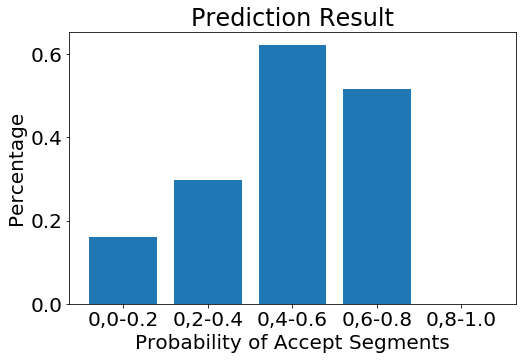

In [40]:
#Graph the BarPlot
import numpy as np
bins = ('0,0-0.2','0,2-0.4','0,4-0.6','0,6-0.8','0,8-1.0')
ypos = np.arange(len(bins))
plt.figure(figsize=(8,5))
matplotlib.rcParams.update({'font.size':20})
plt.bar(ypos,LIST, align = "center")
plt.xticks(ypos, bins)
plt.title('Prediction Result')
plt.xlabel('Probability of Accept Segments')
plt.ylabel('Percentage')

In [38]:
###C Compute Prob of acceptance for 2 customers
### Customer 1: Tier=2, Amount=18000, APR=5, Prime=2.13, Accept=NA
### Customer 1: Tier=2, Amount=30000, APR=5, Prime=2.13, Accept=NA

In [375]:
Customer1_Prob = logistic.predict_proba([[2, 18000, 5, 2.13]])
Customer2_Prob = logistic.predict_proba([[2, 30000, 5, 2.13]])

print ("The Acceptance Probability for Customer 1 is", Customer1_Prob[:,1])
print ("The Acceptance Probability for Customer 2 is", Customer2_Prob[:,1])

The Acceptance Probability for Customer 1 is [0.43699802]
The Acceptance Probability for Customer 2 is [0.29137524]


# 2. WEB CRAWLER

In [2]:
from bs4 import BeautifulSoup
import re, urllib.parse, urllib.request
maxNumUrl = 50
keywords = ["finance", "engineering","business","research"]

url = "http://www8.gsb.columbia.edu/"

opened = []
seen = dict()
urls = dict()
urls[url] = 1

while len(urls) > 0 and len(opened) < maxNumUrl:
    try:
        curr_url = max(urls, key=urls.get)
        urls.pop(curr_url)
        webpage = urllib.request.urlopen(curr_url)
        opened.append(curr_url)
        
    except Exception as ex:
        continue 
    #c    
    htmltext = BeautifulSoup(webpage,"html5lib")
    
    #d
    score = 0
    for text in htmltext.get_text().lower().split():
        if text in keywords:
            score = score + 1
    #e       
    seen[curr_url] = score

    ##F
    if seen[curr_url] > 0:
        for tag in htmltext.find_all(href = True): 
            childUrl = tag['href']         
            original_childurl = childUrl
            childUrl = urllib.parse.urljoin(url, childUrl)
            if url in childUrl and childUrl not in seen:
                urls[childUrl] = score

print(len(seen))
print(len(opened))

50
50


In [11]:
list_of_dict = [[v,k] for k, v in urls.items()]
list_of_dict.sort(reverse = True)
list_of_dict[0:25]
for freq, word in list_of_dict[0:25]:
    print (freq, word)

print("Top 25 Scoring URLs:", (freq, word))

48 http://www8.gsb.columbia.edu/researcharchive/articles/7491
48 http://www8.gsb.columbia.edu/researcharchive/articles/7487
48 http://www8.gsb.columbia.edu/researcharchive/articles/6364
48 http://www8.gsb.columbia.edu/researcharchive/articles/6337
48 http://www8.gsb.columbia.edu/researcharchive/articles/6247
48 http://www8.gsb.columbia.edu/researcharchive/articles/6136
48 http://www8.gsb.columbia.edu/researcharchive/articles/6116
48 http://www8.gsb.columbia.edu/researcharchive/articles/6068
48 http://www8.gsb.columbia.edu/researcharchive/articles/5950
48 http://www8.gsb.columbia.edu/researcharchive/articles/5818
48 http://www8.gsb.columbia.edu/researcharchive/articles/5637
48 http://www8.gsb.columbia.edu/researcharchive/articles/5625
48 http://www8.gsb.columbia.edu/researcharchive/articles/5615
48 http://www8.gsb.columbia.edu/researcharchive/articles/4686
48 http://www8.gsb.columbia.edu/researcharchive/articles/4610
48 http://www8.gsb.columbia.edu/researcharchive/articles/3248
48 http:

# 3. Bash Question

# Output:    
    3 Iris-versicolor
    22 Iris-virginica
